In [91]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats

In [92]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Country
;'''

cur.execute(query)

In [93]:
countries_data = cur.fetchall()
countries_df = pd.DataFrame(countries_data)
countries_df.columns = [i[0] for i in cur.description]
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [94]:
#Is there a statistical difference in the odds of 
#winning a game when a team is playing in front of their home crowd?

In [95]:
#type of test?
#likelihood of random noise?
#how confident are we?

In [96]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM League
;'''

cur.execute(query)

league_data = cur.fetchall()
league_df = pd.DataFrame(league_data)
league_df.columns = [i[0] for i in cur.description]
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [97]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Match
;'''

cur.execute(query)

match_data = cur.fetchall()
match_df = pd.DataFrame(match_data)
match_df.columns = [i[0] for i in cur.description]

In [98]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to bsa
dtypes: float64(66), int64(9), object(40)
memory usage: 22.8+ MB


In [99]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Player_Attributes
;'''

cur.execute(query)

player_attrib_data = cur.fetchall()
player_attrib_df = pd.DataFrame(player_attrib_data)
player_attrib_df.columns = [i[0] for i in cur.description]
player_attrib_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [100]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team
;'''

cur.execute(query)

team_data = cur.fetchall()
team_df = pd.DataFrame(team_data)
team_df.columns = [i[0] for i in cur.description]
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [101]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team_Attributes
;'''

cur.execute(query)

team_attrib_data = cur.fetchall()
team_attrib_df = pd.DataFrame(team_attrib_data)
team_attrib_df.columns = [i[0] for i in cur.description]
team_attrib_df.head()

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [102]:
player_df = pd.read_csv('player.csv')
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


### HYPOTHESIS TEST 1:
##### Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?

- H0 (Null Hypothesis): there is no statistically significant difference in the odds of winning a game when a team is at playing at home vs. when a team is playing away (mu_win_rate_home = mu_win_rate_away)
- HA (Alternative Hypothesis): there is a statistically significant difference in the odds of winning a game when a team is playing at home vs. when a team is playing away (mu_win_rate_home != mu_win_rate_away)

- Alpha = 0.05

##### Assumptions:
- Data is collected randomly
- Data is independent
- Data is approximately normally distributed

In [103]:
#create new column home_team_win with binary values - Home team winning = 1, Tie=0.5, Away team winning = 0
match_df['home_team_win'] = np.zeros
match_df['away_team_win'] = np.zeros

In [104]:
match_df['home_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 1
match_df['home_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 0
match_df['home_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

match_df['away_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 1
match_df['away_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 0
match_df['away_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [105]:
home_team_win_array = np.array(match_df['home_team_win'])
away_team_win_array = np.array(match_df['away_team_win'])


x_bar_home = np.mean(home_team_win_array)
x_bar_away = np.mean(away_team_win_array)

diff = x_bar_home - x_bar_away
diff

0.17133069017283187

In [106]:
home_team_win_array

array([0, 0, 0, ..., 1, 0, 1])

In [126]:
sample_means_home = []
for _ in range(50):
    sample_mean = np.random.choice(home_team_win_array,size=100).mean()
    sample_means_home.append(sample_mean)
len(sample_means_home)

sample_means_away = []
for _ in range(50):
    sample_mean = np.random.choice(away_team_win_array,size=100).mean()
    sample_means_away.append(sample_mean)
len(sample_means_away)

50

In [127]:
sample_means_home

[0.43,
 0.45,
 0.46,
 0.4,
 0.5,
 0.55,
 0.41,
 0.51,
 0.37,
 0.5,
 0.47,
 0.51,
 0.46,
 0.44,
 0.45,
 0.42,
 0.46,
 0.47,
 0.42,
 0.42,
 0.6,
 0.39,
 0.56,
 0.42,
 0.53,
 0.5,
 0.46,
 0.51,
 0.57,
 0.41,
 0.46,
 0.5,
 0.42,
 0.41,
 0.47,
 0.51,
 0.35,
 0.44,
 0.52,
 0.44,
 0.42,
 0.41,
 0.43,
 0.51,
 0.44,
 0.42,
 0.44,
 0.42,
 0.47,
 0.46]

In [128]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = variance(sample1), variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)

def twosample_tstatistic(expr, ctrl):
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t


In [129]:
t_stat = twosample_tstatistic(sample_means_home, sample_means_away)

t_stat

18.952670063289602

In [130]:
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=18.952670063289606, pvalue=1.5174942390863615e-34)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


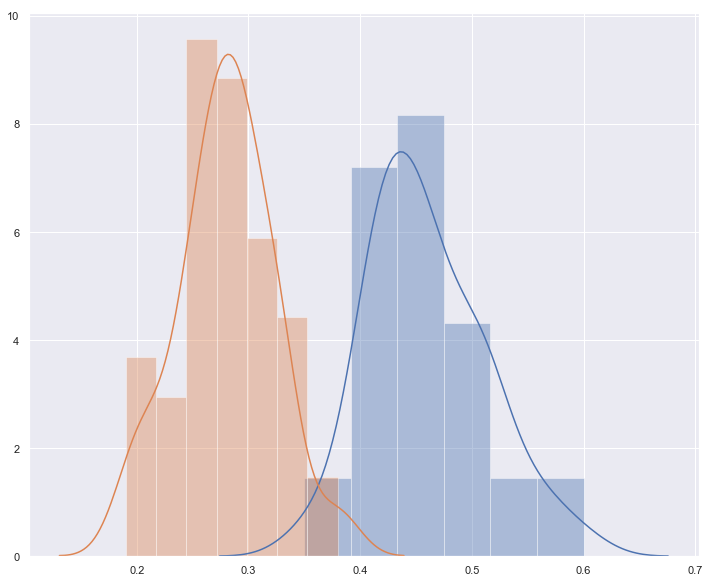

In [131]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample_means_home) # Blue distribution
sns.distplot(sample_means_away) # Orange distribution

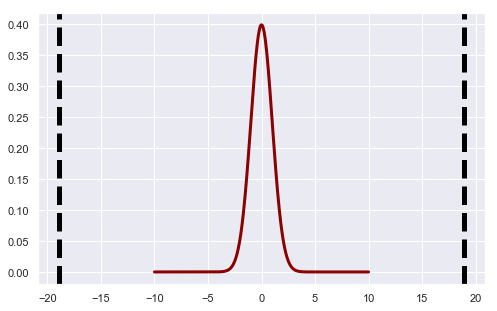

In [132]:
def visualize_t(t_stat, n_control, n_experimental):
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -40 and 40:
    xs = np.linspace(-10, 10, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

    plt.show()
    return None

n_home = len(home_team_win_array)
n_away = len(away_team_win_array)
visualize_t(t_stat, n_home, n_away)

In [133]:
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=18.952670063289606, pvalue=1.5174942390863615e-34)

## Conclusion:
#### We reject the Null Hypothesis (H0) that there is no statistically significant difference between the average win rate of home teams and the average win rate of away teams. 


 ## HYPOTHESIS TEST 2

- NULL: THERE IS NO DIFFERENCE IN WIN RATE BETWEEN 442 and 433
 
- HA: THERE IS A STAT DIFF IN WIN RATE 

In [98]:
match_df.head(2).T

,0,1
id,565,566
country_id,1,1
league_id,1,1
season,2010/2011,2010/2011
stage,15,15
date,2010-11-13 00:00:00,2010-11-14 00:00:00
match_api_id,838651,838652
home_team_api_id,8342,9991
away_team_api_id,9989,8635
home_team_goal,2,1


In [76]:
def OnlyNum(s,oth=''):   
    fomart = '0123456789'   
    for c in s:   
        if (c in fomart) == False:   
             s = s.replace(c,'');   
    return s
#change the format of formation form str, this is for parse formation, only numbers show

In [77]:
home_formation = {}
away_formation = {}
#create two dict to store home team formation and away team formation, key is match_api_id, value is formation like '442'

In [99]:
match_df_h2 = match_df[['match_api_id','home_team_goal','away_team_goal','home_player_y1','home_player_y2','home_player_y3',
                'home_player_y4','home_player_y5','home_player_y6','home_player_y7','home_player_y8','home_player_y9',
                'home_player_y10','home_player_y11','away_player_y1','away_player_y2','away_player_y3','away_player_y4',
                'away_player_y5','away_player_y6','away_player_y7','away_player_y8','away_player_y9','away_player_y10','away_player_y11']].copy()